# Sklearn

## sklearn.liner_model

**linear_model:**
* RidgeClassifier
* SGDClassifier
* SGDRegressor
* LinearRegression
* LogisticRegression
* Lasso
* etc

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

примеры: http://scikit-learn.org/stable/modules/linear_model.html#linear-model

In [43]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [44]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация данных

In [45]:
blobs = datasets.make_blobs(centers=2, cluster_std=5.5, random_state=42)

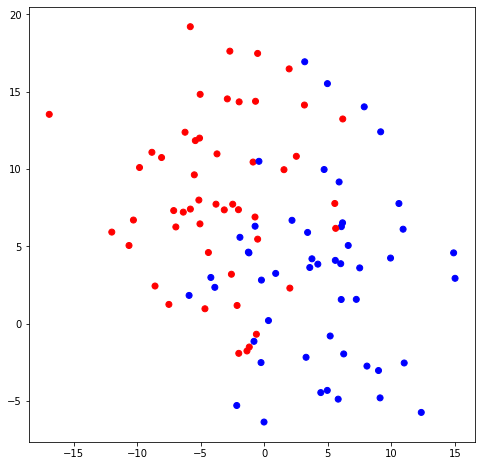

In [46]:
colors = ListedColormap(["red", "blue"])

pylab.figure(figsize(8, 8))
pylab.scatter([x[0] for x in blobs[0]], [x[1] for x in blobs[0]], c=blobs[1], cmap=colors)

In [47]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(blobs[0], blobs[1], 
                                                                                    test_size=0.3,
                                                                                    random_state=42)

### Линейная классификация

#### RidgeClassifier

In [48]:
ridge_classifier = linear_model.RidgeClassifier(random_state=1)

In [49]:
ridge_classifier.fit(train_data, train_labels)

RidgeClassifier(random_state=1)

In [50]:
ridge_predictions = ridge_classifier.predict(test_data)

In [51]:
print(test_labels)

[0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1]


In [52]:
print(ridge_predictions)

[0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1]


In [53]:
metrics.accuracy_score(test_labels, ridge_predictions)

0.8

In [54]:
ridge_classifier.coef_

array([[ 0.09600369, -0.04736985]])

In [55]:
ridge_classifier.intercept_ 

array([0.30601131])

#### LogisticRegression

In [56]:
log_regressor = linear_model.LogisticRegression(random_state=1)
log_regressor.fit(train_data, train_labels)

lr_predictions = log_regressor.predict(test_data)
lr_proba_predictions = log_regressor.predict_proba(test_data)

In [60]:
print(test_labels)

[0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1]


In [61]:
print(lr_predictions)

[0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1]


In [62]:
print(lr_proba_predictions)

[[8.92589970e-01 1.07410030e-01]
 [4.29379184e-02 9.57062082e-01]
 [9.74779832e-01 2.52201675e-02]
 [7.74059603e-02 9.22594040e-01]
 [4.40784175e-02 9.55921583e-01]
 [2.61073282e-01 7.38926718e-01]
 [3.54052268e-03 9.96459477e-01]
 [1.36122190e-02 9.86387781e-01]
 [4.61202643e-01 5.38797357e-01]
 [9.17005286e-01 8.29947139e-02]
 [1.49840175e-02 9.85015983e-01]
 [8.56213324e-01 1.43786676e-01]
 [8.80533115e-03 9.91194669e-01]
 [1.04805627e-01 8.95194373e-01]
 [5.15224220e-04 9.99484776e-01]
 [1.16667944e-01 8.83332056e-01]
 [2.62055599e-02 9.73794440e-01]
 [9.36932477e-01 6.30675229e-02]
 [9.58464449e-01 4.15355510e-02]
 [9.84643858e-01 1.53561421e-02]
 [5.47315624e-03 9.94526844e-01]
 [1.80357045e-02 9.81964296e-01]
 [8.90312322e-02 9.10968768e-01]
 [5.54429071e-01 4.45570929e-01]
 [4.39851390e-02 9.56014861e-01]
 [2.00881881e-01 7.99118119e-01]
 [4.88395786e-01 5.11604214e-01]
 [4.27439823e-01 5.72560177e-01]
 [9.57207868e-01 4.27921319e-02]
 [1.24397527e-03 9.98756025e-01]]


In [63]:
print(metrics.accuracy_score(test_labels, lr_predictions))

0.7666666666666667


In [64]:
print(metrics.accuracy_score(test_labels, ridge_predictions))

0.8


### Оценка качества по cross-validation

#### cross_val_score

In [65]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring="accuracy", cv=10)

In [66]:
lr_scoring = model_selection.cross_val_score(log_regressor, blobs[0], blobs[1], scoring="accuracy", cv=10)

In [67]:
lr_scoring

array([0.9, 0.6, 0.9, 0.7, 0.8, 0.8, 0.9, 0.8, 0.9, 0.8])

In [68]:
score_mean = ridge_scoring.mean()
score_max = ridge_scoring.max()
score_min = ridge_scoring.min()
score_std = ridge_scoring.std()
print(f"Ridge mean: {score_mean}, max: {score_max}, min: {score_min}, std: {score_std}")

Ridge mean: 0.8100000000000002, max: 0.9, min: 0.6, std: 0.09433981132056606


In [69]:
lr_score_mean = lr_scoring.mean()
lr_score_max = lr_scoring.max()
lr_score_min = lr_scoring.min() 
lr_score_std = lr_scoring.std()

print(f"Log mean: {lr_score_mean}, max: {lr_score_max}, min: {lr_score_min}, std: {lr_score_std}")

Log mean: 0.8100000000000002, max: 0.9, min: 0.6, std: 0.09433981132056606


#### cross_val_score с заданными scorer и cv_strategy

In [70]:
scorer = metrics.make_scorer(metrics.accuracy_score)

In [71]:
cv_strategy = model_selection.StratifiedShuffleSplit(n_splits=20, test_size = 0.3, random_state = 2)
cv_strategy.get_n_splits(blobs[1])

20

In [72]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

In [73]:
lr_scoring = model_selection.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

In [74]:
ridge_score_mean = ridge_scoring.mean()
ridge_score_max = ridge_scoring.max() 
ridge_score_min = ridge_scoring.min()
ridge_score_std = ridge_scoring.std()

print(f"Ridge mean: {ridge_score_mean}, max: {ridge_score_max}, min: {ridge_score_min}, std: {ridge_score_std}")

Ridge mean: 0.8100000000000002, max: 0.9333333333333333, min: 0.6666666666666666, std: 0.07461009761866465


In [75]:
lr_score_mean = lr_scoring.mean()
lr_score_max = lr_scoring.max()
lr_score_min = lr_scoring.min() 
lr_score_std = lr_scoring.std()

print(f"Log mean: {lr_score_mean}, max: {lr_score_max}, min: {lr_score_min}, std: {lr_score_std}")

Log mean: 0.8083333333333333, max: 0.9333333333333333, min: 0.6666666666666666, std: 0.07369230323144717
